In [1]:
# Importing dependencies
import numpy as np
import math
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

In [2]:
# Defining a Linear Congruence Generator
def uniform_generator(x):
    a = 1597
    c = 2330197
    m = 2**32
    x = (a*x + c)%m
    return x/m, x

In [3]:
# defining a normal generator using the Box-Muller method to sample from N(0, 1)
def normal_generator(x_1, x_2):
    u1, x_1 = uniform_generator(x_1)
    u2, x_2 = uniform_generator(x_2)
    r = math.sqrt(-2*math.log(u1))
    theta = 2*math.pi*u2
    return r*math.cos(theta), r*math.sin(theta), x_1, x_2

## Q1
Using the recursive formula W(ti+1) = Wt + sqrt(ti+1 - ti).Zi+1, by for the 5000 values of ti in between (0, 5000)
Then repeating this sample path for 10 different paths.

Expectation of E[W(2.5)] = -0.47584388188758525, Actual Expectation: 0
Expectation of E[W(5)] = -0.8712853598960242, Actual Expectation: 0


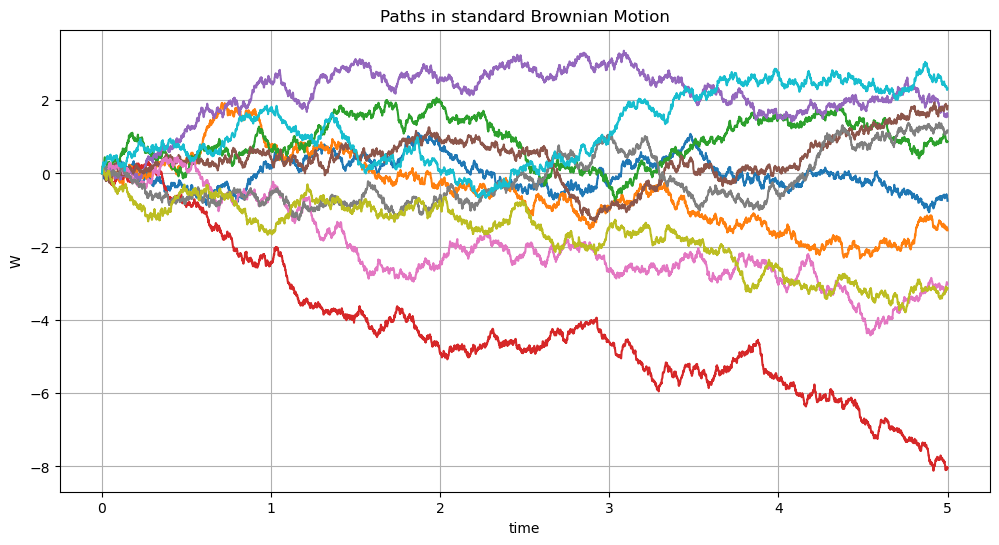

In [5]:
N = 10 # Set number of paths here, increase to make expectation congverge to 0.
np.random.seed(42)
t = [0.001*i for i in range(5001)]
# print(t)
W = [[] for _ in range(N)]
# seeds = np.random.rand(N) # Used only to get different values for the seeds, use only when N > 10.
# seeds *= 1000
# seeds //= 1
seeds = [42, 12, 437, 57, 23, 78, 68, 89, 543, 100] # Seeds for generating the different paths, for N <= 10.
for path in range (N):
    W[path].append(0) # Setting W(0) = 0
    x1 = seeds[path]
    x2 = seeds[(path + 3)%N]
    # Now empolying the recursive formula, W(ti+1) = W(ti) + sqrt(ti+1 - ti)*Z(i+1)
    for i in range(5000):
        Zi_1, Z_i_1, x1, x2 = normal_generator(x1, x2)
        W[path].append(W[path][i] + math.sqrt(t[i+1] - t[i])*Zi_1)

sum_2_5 = 0
sum_5 = 0
for i in range(N):
    sum_2_5 += W[i][2500]
    sum_5 += W[i][5000]

print(f"Expectation of E[W(2.5)] = {sum_2_5/N}, Actual Expectation: 0")
print(f"Expectation of E[W(5)] = {sum_5/N}, Actual Expectation: 0")
plt.figure(figsize=(12, 6))
for path in range(N):
    plt.plot(t, W[path], label=f'Path: {path}')

plt.title("Paths in standard Brownian Motion")
plt.xlabel('time')
plt.ylabel('W')
plt.grid(True)
plt.show()

## Q2
Repeating the above exercise for a Brownian Motion BM(mu, sigma)
X(0) = 5

Expectation of E[W(2.5)] = 4.98707805905657, Actual: 5.225
Expectation of E[W(5)] = 5.014357320052705, Actual: 5.45


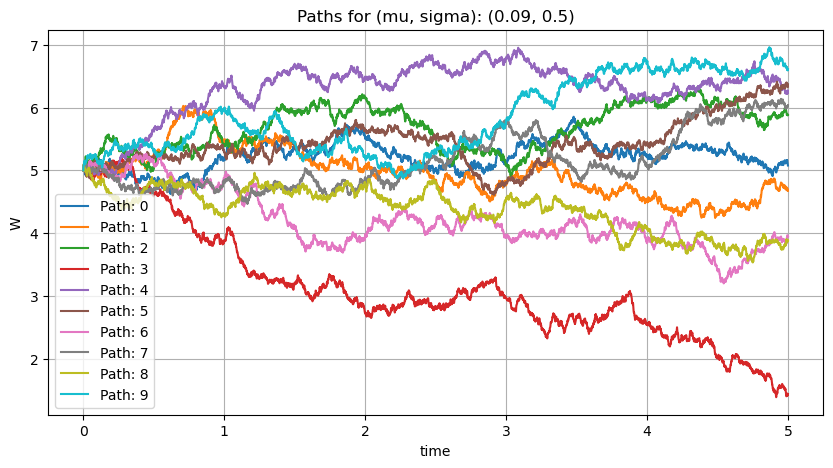


-------------------------------------------------------------------------

Expectation of E[W(2.5)] = 7.131039029527412, Actual: 7.25
Expectation of E[W(5)] = 9.28217866002479, Actual: 9.5


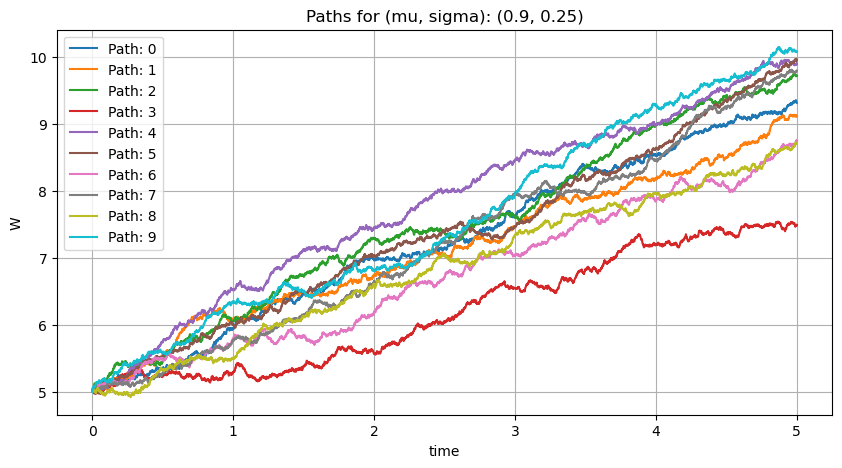


-------------------------------------------------------------------------

Expectation of E[W(2.5)] = 7.226207805904933, Actual: 7.25
Expectation of E[W(5)] = 9.456435732003902, Actual: 9.5


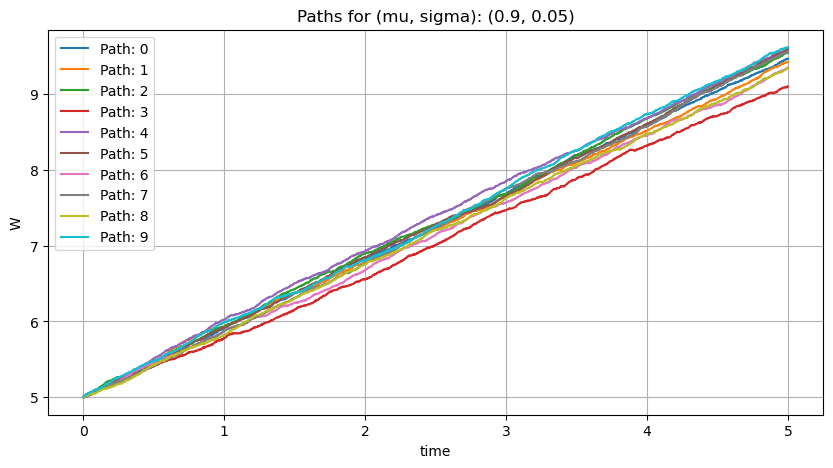


-------------------------------------------------------------------------



In [7]:
parameters = [(0.09, 0.5), (0.9, 0.25), (0.9, 0.05)]
np.random.seed(42)
for (mu, sigma) in parameters:
    N = 10 # Set number of paths here, increase to make expectation congverge to 0.
    t = [0.001*i for i in range(5001)]
    W = [[] for _ in range(N)]
    # seeds = np.random.rand(N) # Used only to get different values for the seeds,.use when N > 10/
    # seeds *= 100*N
    # seeds //= 1
    seeds = [42, 12, 437, 57, 23, 78, 68, 89, 543, 100] # Seeds for generating the different paths. Can use this alternative if N = 10.
    for path in range(N):
        W[path].append(5) # Setting X(0) = 5
        x1 = seeds[path]
        x2 = seeds[(path + 3)%N] # 3 is just taken randomly, can be anything, just wanted to get 2 different seeds.
        # Now empolying the recursive formula, X(ti+1) = X(ti) + mu*(ti+1 - ti) + sqrt(ti+1 - ti)*Z(i+1)
        for i in range(5000):
            Zi_1, Z_i_1, x1, x2 = normal_generator(x1, x2)
            W[path].append(W[path][i] + mu*(t[i+1] - t[i]) +  sigma*math.sqrt(t[i+1] - t[i])*Zi_1)
    
    sum_2_5 = 0
    sum_5 = 0
    for i in range(N):
        sum_2_5 += W[i][2500]
        sum_5 += W[i][5000]
    
    print(f"Expectation of E[W(2.5)] = {sum_2_5/N}, Actual: {5 + mu*(2.5)}")
    print(f"Expectation of E[W(5)] = {sum_5/N}, Actual: {5 + mu*(5)}")
    plt.figure(figsize=(10, 5))
    for path in range(N):
        plt.plot(t, W[path], label=f'Path: {path}')
    
    plt.title(f"Paths for (mu, sigma): {(mu, sigma)}")
    plt.xlabel('time')
    plt.ylabel('W')
    plt.grid(True)
    plt.legend()
    plt.show()
    print("\n-------------------------------------------------------------------------\n")

## Q3
Repeating the above procedure for the Euler approximation method, the only difference is that mu and sigma are now time dependent.


Expectation of E[W(2.5)] = 4.90876025733528
Expectation of E[W(5)] = 4.503447817875215


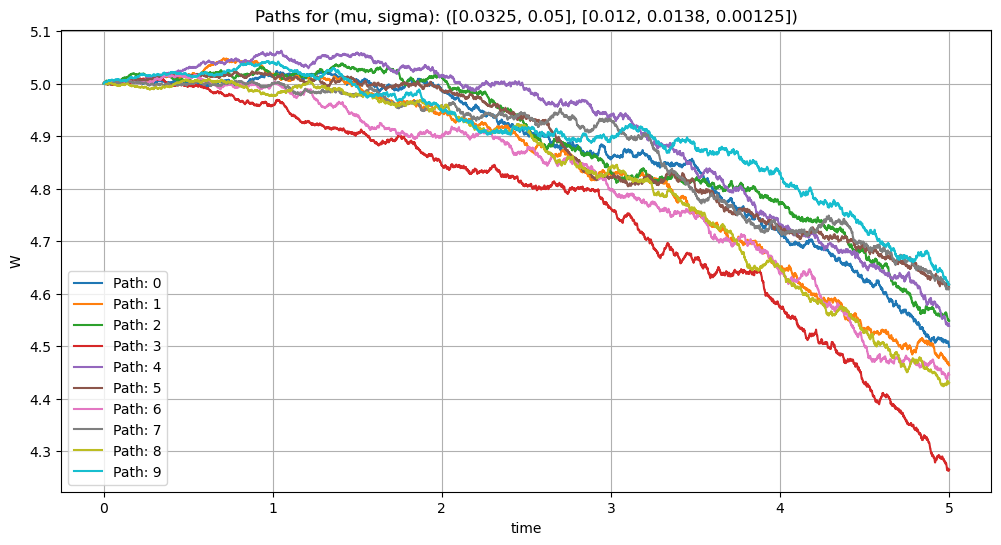


-------------------------------------------------------------------------



In [9]:
parameters = [([0.0325, 0.05], [0.012, 0.0138, 0.00125])]
np.random.seed(42)
for (mu, sigma) in parameters:
    N = 10 # Set number of paths here, increase to make expectation congverge to 0.
    t = [0.001*i for i in range(5001)]
    W = [[] for _ in range(N)]
    # seeds = np.random.rand(N) # Used only to get different values for the seeds, use when N > 10.
    # seeds *= 100*N
    # seeds //= 1
    seeds = [42, 12, 437, 57, 23, 78, 68, 89, 543, 100] # Seeds for generating the different paths. Can use this alternative if N = 10.
    for path in range(N):
        W[path].append(5) # Setting Y(0) = 5
        x1 = seeds[path]
        x2 = seeds[(path + 3)%N] # 3 is just taken randomly, can be anything, just wanted to get 2 different seeds.
        # Now empolying the recursive formula, Y(ti+1) = Y(ti) + mu(ti)*(ti+1 - ti) + sigma(ti)*sqrt(ti+1 - ti)*Z(i+1)
        for i in range(5000):
            Zi_1, Z_i_1, x1, x2 = normal_generator(x1, x2)
            W[path].append(W[path][i] + (mu[0] - t[i]*mu[1])*(t[i+1] - t[i]) +  (sigma[0] + sigma[1]*t[i] - sigma[2]*(t[i]**2))*math.sqrt(t[i+1] - t[i])*Zi_1)
    
    sum_2_5 = 0
    sum_5 = 0
    for i in range(N):
        sum_2_5 += W[i][2500]
        sum_5 += W[i][5000]
    
    print(f"Expectation of E[W(2.5)] = {sum_2_5/N}")
    print(f"Expectation of E[W(5)] = {sum_5/N}")
    plt.figure(figsize=(12, 6))
    for path in range(N):
        plt.plot(t, W[path], label=f'Path: {path}')
    
    plt.title(f"Paths for (mu, sigma): {(mu, sigma)}")
    plt.xlabel('time')
    plt.ylabel('W')
    plt.grid(True)
    plt.legend()
    plt.show()
    print("\n-------------------------------------------------------------------------\n")

## Q4
Simulating a Stock Price movement.
Simulating the process for the following $(\mu, \sigma)$ pairs:
* (0.09, 0.05)
* (0.09, 0.5)
* (-0.09, 0.05)
* (-0.09, 0.5)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Simulated Expectation of E[S(5)] = 7.771750788255224, Actual Expectation: 7.8415609274508435


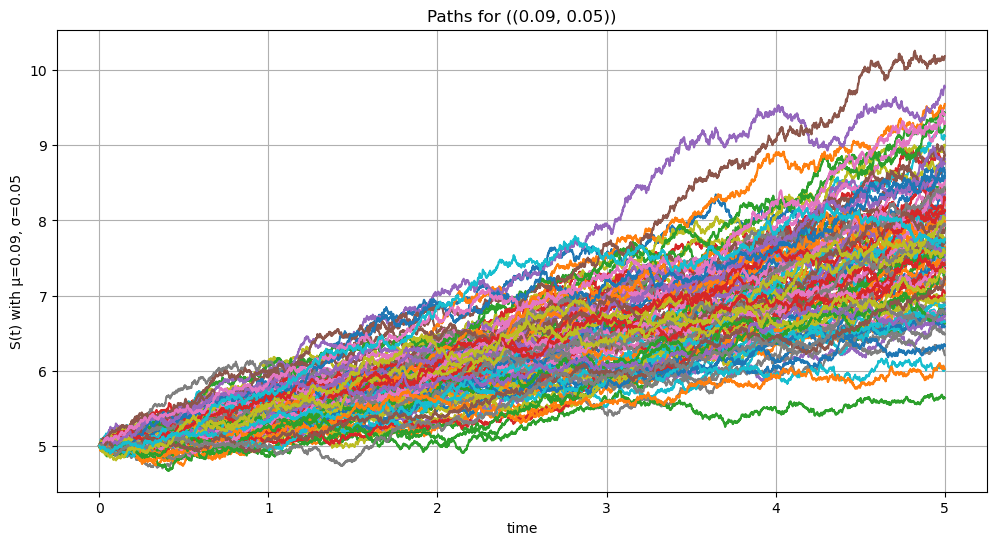


--------------------------------------------------



  0%|          | 0/100 [00:00<?, ?it/s]

Simulated Expectation of E[S(5)] = 6.549524558282676, Actual Expectation: 7.8415609274508435


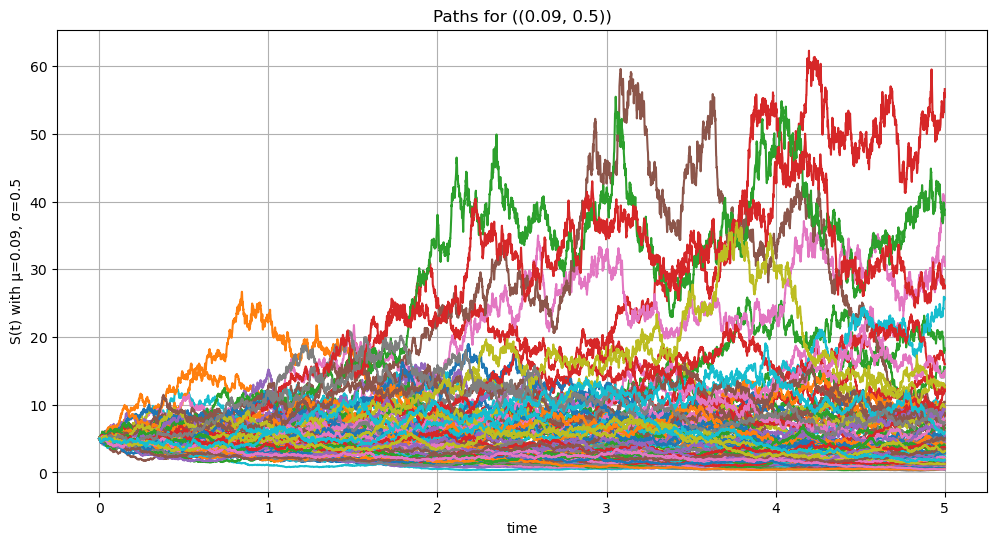


--------------------------------------------------



  0%|          | 0/100 [00:00<?, ?it/s]

Simulated Expectation of E[S(5)] = 3.161387937821142, Actual Expectation: 3.1881407581088665


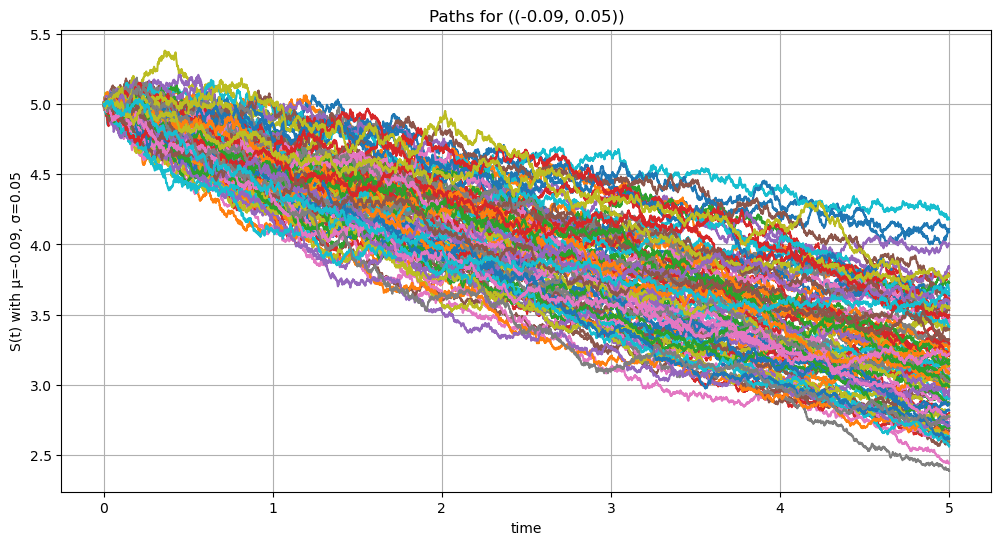


--------------------------------------------------



  0%|          | 0/100 [00:00<?, ?it/s]

Simulated Expectation of E[S(5)] = 2.943681237480281, Actual Expectation: 3.1881407581088665


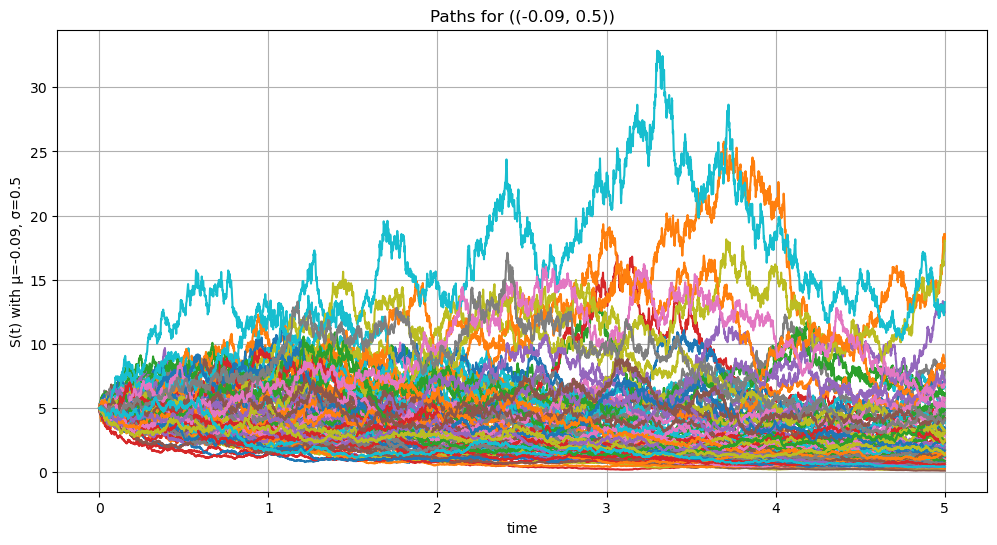


--------------------------------------------------



In [11]:
N = 100 # Set number of paths here, increase to make expectation congverge to 0.
np.random.seed(42)
params = [(0.09, 0.05), (0.09, 0.5), (-0.09, 0.05), (-0.09, 0.5)]
for (mu, sigma) in tqdm(params):
    t = [0.001*i for i in range(5001)]
    # print(t)
    W = [[] for _ in range(N)]
    seeds = np.random.rand(N) # Used only to get different values for the seeds, use only when N > 10.
    seeds *= N
    seeds //= 1
    # seeds = [42, 12, 437, 57, 23, 78, 68, 89, 543, 100] # Seeds for generating the different paths, only for N <= 10.
    for path in tqdm(range(N)):
        W[path].append(5) # Setting Y(0) = 0
        x1 = seeds[path]
        x2 = seeds[(path + 3)%N]
        # Now empolying the recursive geometric brownian motion formula, S(ti+1) = S(ti)*exp{1/2(mu - sigma^2)*(ti+1 - ti) + sigma*sqrt(ti+1 - ti)*Z(i+1)
        for i in range(5000):
            z = np.random.randn()
            Zi_1, Z_i_1, x1, x2 = normal_generator(x1, x2)
            W[path].append(W[path][i]*math.exp(((mu - (sigma**2)/2)*(t[i+1] - t[i])) + sigma*math.sqrt(t[i+1] - t[i])*z))
    
    sum_2_5 = 0
    sum_5 = 0
    for i in range(N):
        sum_2_5 += W[i][2500]
        sum_5 += W[i][5000]
    
    print(f"Simulated Expectation of E[S(5)] = {sum_5/N}, Actual Expectation: {W[0][0]*math.exp(mu*5)}")
    plt.figure(figsize=(12, 6))
    for path in range(N):
        plt.plot(t, W[path], label=f'Path: {path}')
    
    plt.title(f"Paths for ({mu, sigma})")
    plt.xlabel('time')
    plt.ylabel(f"S(t) with µ={mu}, σ={sigma}")
    plt.grid(True)
    # plt.legend(loc="upper left")
    plt.show()
    print("\n--------------------------------------------------\n")

  0%|          | 0/1000 [00:00<?, ?it/s]

Actual Expectation of E[S(1)] is 5.309182732726798


Text(0, 0.5, 'E[S(1)]')

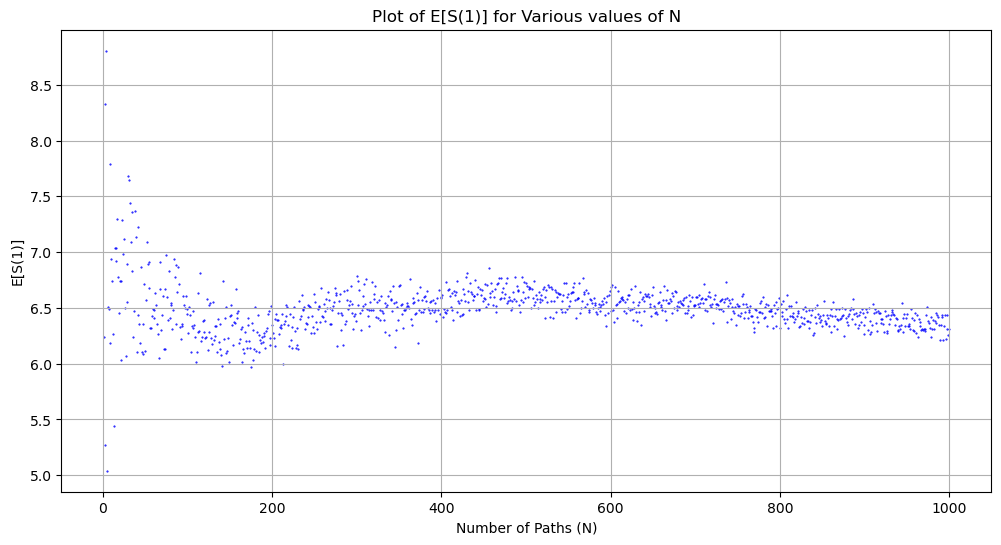

In [12]:
N = [ i for i in range(1, 1001)]
S_0 = 5
mu = 0.06
sigma = 0.3
num_timesteps = 50
t = [(1/num_timesteps)*i for i in range(num_timesteps + 1)] # Time steps
E_S1 = []

for n in tqdm(N):
    S = [[] for _ in range(n)]
    seeds = np.random.rand(n) # Used only to get different values for the seeds, use only when N > 10.
    seeds *= n
    seeds //= 1
    for path in range(n):
        S[path].append(S_0) # Setting S(0).
        x1 = seeds[path]
        x2 = seeds[(path + 3)%n]
        # Now employing the recursive geometric brownian motion formula, S(ti+1) = S(ti)*exp{1/2(mu - sigma^2)*(ti+1 - ti) + sigma*sqrt(ti+1 - ti)*Z(i+1)
        for i in range(num_timesteps):
            Zi_1, Z_i_1, x1, x2 = normal_generator(x1, x2)
            S[path].append(S[path][i]*math.exp(((mu - (sigma**2)/2)*(t[i+1] - t[i])) + sigma*math.sqrt(t[i+1] - t[i])*Zi_1))
    S = np.array(S)
    mean = np.mean(S[:, num_timesteps])
    E_S1.append(mean)

print(f"Actual Expectation of E[S(1)] is {S_0*math.exp(mu)}")
plt.figure(figsize=(12, 6))
plt.title("Plot of E[S(1)] for Various values of N")
plt.scatter(x=N, y=E_S1, color='blue', s=0.25)
plt.xlabel("Number of Paths (N)")
plt.grid(True)
plt.ylabel("E[S(1)]")
        


# end